# Volatility smile 2

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
symbol = "^SPX"
ticker = yf.Ticker(symbol)
exp_date = ticker.options[40]
option_chain = ticker.option_chain(exp_date)
calls = option_chain.calls
puts = option_chain.puts
s0 = yf.download(symbol, start="2023-01-01", interval="1d")["Close"]
s0 = s0[-1]
exp_date, s0

[*********************100%***********************]  1 of 1 completed


('2024-04-19', 4461.41015625)

In [11]:
calls = calls[calls["impliedVolatility"] > 0.05 ]

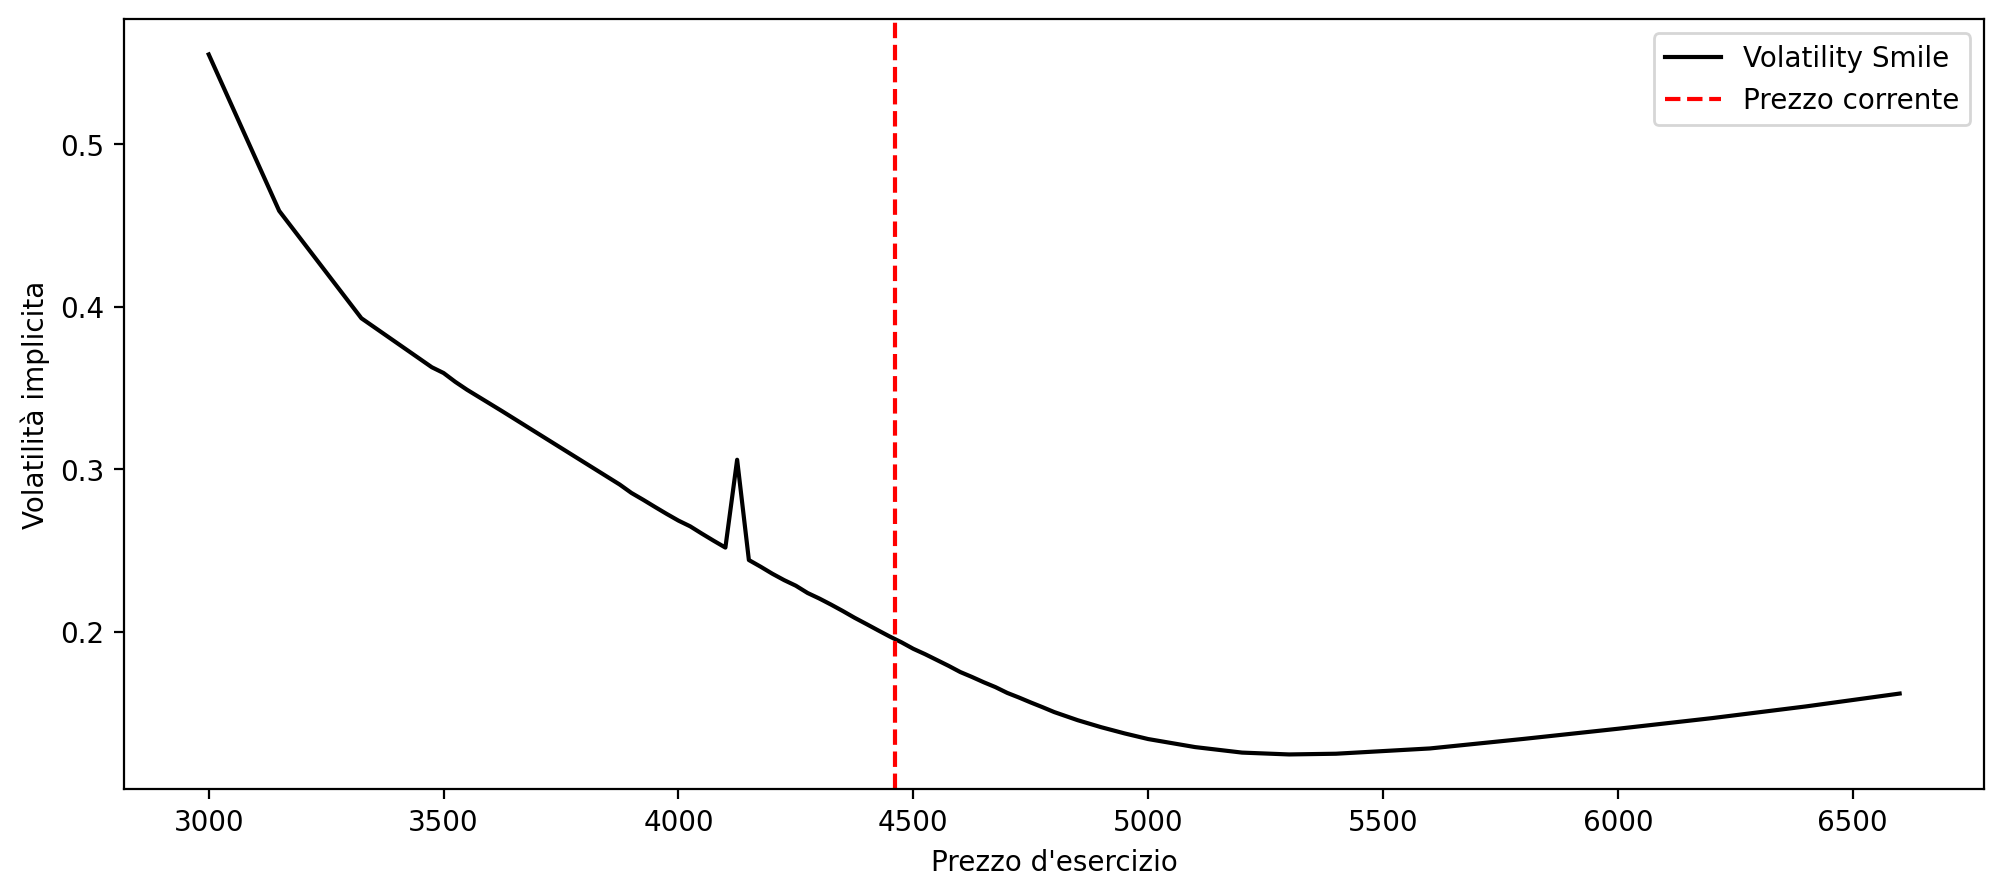

In [20]:
# calls
plt.figure(figsize=(12,5), dpi=200)
plt.plot(calls["strike"], calls["impliedVolatility"], color="Black", label="Volatility Smile")
plt.axvline(x=s0, color="red", linestyle="--", label="Prezzo corrente")
plt.xlabel("Prezzo d'esercizio")
plt.ylabel("Volatilità implicita")
plt.legend()
plt.show()


In [23]:
corrdata = pd.DataFrame({"Prezzo dell'opzione": calls["lastPrice"], 'Volatilità implicita': calls["impliedVolatility"]})
df = corrdata.corr()
df

,Prezzo dell'opzione,Volatilità implicita
Prezzo dell'opzione,1.000000,0.990254
Volatilità implicita,0.990254,1.000000
